In [43]:
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt
from networkx.algorithms.cluster import average_clustering
from networkx.algorithms.centrality import eigenvector_centrality, closeness_centrality
from networkx.algorithms.distance_measures import diameter

In [90]:
def get_network(df, from_hashtag=""):
    ''' returns a dataframe with the edges and timestamp from tweets feed (df)'''
    
    if from_hashtag != "":
        mask = df["hashtags"].apply(lambda x: from_hashtag.lower() in x)
        filteredDf = df[mask]
    else:
        filteredDf = df

    edges_df = filteredDf[['screen_name', 'reply_to_screen_name', 'created_at']]

    # mask = (df.screen_name == df.reply_to_screen_name)
    # edges_df = edges_df[~mask] 
    edges_df = edges_df.dropna()
    edges_df = edges_df.drop_duplicates().reset_index(drop=True)
    edges_df = edges_df.rename(columns={'screen_name': 'from', 'reply_to_screen_name': 'to'})
    
    return edges_df

# takes our main dataset and combines `reply_to_screen_name` and `mentions` from tweets
# into a single `to` column
# also drops tweets that don't have any mentiosn ore replying to someone
# this should ALWAYS be used to get our primary data for the dataset
def transform_df(df):
    edges_df = df[['screen_name', 'reply_to_screen_name', 'created_at', 'hashtags', 'mentions', 'followers_count', 'friends_count', 'text', 'is_quote', 'is_retweet', 'favourites_count', 'retweet_count', 'country_code', 'verified', 'lang']]

    edges_df["hashtags"] = edges_df["hashtags"].apply(lambda x: ",".join(x))
    edges_df["mentions"] = edges_df["mentions"].apply(lambda x: ",".join(x))

    edges_df["to"] = "@" + edges_df["reply_to_screen_name"] + "," + edges_df["mentions"]
    edges_df["to"] = edges_df["to"].fillna("")

    edges_df["to"] = edges_df["to"].apply(lambda x: ",".join(list(set(x.split(",")))))
    edges_df["to"] = edges_df["to"].apply(lambda x: x[1:] if len(x)>0 and x[0]=="," else x)

    edges_df = edges_df.drop(["reply_to_screen_name", "mentions"], axis=1)
    edges_df["country_code"] = edges_df["country_code"].fillna("")
    filter = edges_df["to"] != ""
    edges_df = edges_df[filter]
    edges_df = edges_df.drop_duplicates().reset_index(drop=True)

    return edges_df

def print_basic_stats(network):
    print("Number of nodes: " + str(network.number_of_nodes()))
    print("Number of edges: " + str(network.number_of_edges()))
    print("Average clustering coefficient: " + str(average_clustering(network)))

    G_deg = nx.degree_histogram(G)
    G_deg_sum = [a * b for a, b in zip(G_deg, range(0, len(G_deg)))]
    print('Average degree: {}'.format(sum(G_deg_sum) / G.number_of_nodes()))

    dirNet = network.to_undirected()
    print("Network diameter: " + str(diameter(dirNet)))
    # print("Eigenvector centrality: " + str(eigenvector_centrality(network)))
    # print("Closeness centrality: " + str(closeness_centrality(network)))

def create_gephi_from_network(network, name):
    nx.write_gexf(network, "./gephis/" + name + "-network.gexf")

def get_strongly_gcc(G):
    """ get the giant strongly connected component of G""" 
    SGcc = max(nx.strongly_connected_components(G), key=len)
    SGcc = G.subgraph(SGcc)
    return SGcc

def get_weakly_gcc(G):
    """ get the giant weakly connected component of G"""  
    WGcc = max(nx.weakly_connected_components(G), key=len)
    WGcc = G.subgraph(WGcc)
    return WGcc
   

def plot_network(G, G_degree=None, outputname="default", color="turquoise", n_color="blue"):
    ''' plot the graph with varying nodesize '''
    
    fig = plt.figure(num=None, figsize=(15, 15), dpi=60, facecolor='b', edgecolor='k')
    pos = nx.spring_layout(G)
    
    if G_degree:
        node_size=[v * 10 for v in dict(G_degree).values()]
    else:
        node_size = 1
        
    nx.draw(G, pos, nodelist=dict(G_degree).keys(), node_size=node_size, width=0.5, alpha=0.5, edge_color=color, node_color=n_color)
    plt.axis('off')
    plt.show()
    fig.savefig("./viz/" +outputname + "-network.svg", transparent=True)

In [24]:
# when we merge dataset and put it in csv, these no longer retain their original types
# so we need the converters + eval to bring their original form back basically
df = pd.read_csv('data/merged-dataset.csv', converters={"hashtags": eval, "mentions": eval, "is_quote": eval}) 
# df.columns

In [66]:
# df    

In [91]:
transform_df(df)

<ipython-input-90-e7f3b8f5923c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_df["hashtags"] = edges_df["hashtags"].apply(lambda x: ",".join(x))
<ipython-input-90-e7f3b8f5923c>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges_df["mentions"] = edges_df["mentions"].apply(lambda x: ",".join(x))
<ipython-input-90-e7f3b8f5923c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

screen_name            created_at  \
0        DZMMTeleRadyo  2020-03-29T00:01:14Z   
1            OrlenysOV  2020-03-29T00:03:10Z   
2          CPHO_Canada  2020-03-29T00:03:14Z   
3          TelemundoUY  2020-03-29T00:03:48Z   
4         zorayapuente  2020-03-29T00:05:37Z   
...                ...                   ...   
41087      CPHO_Canada  2020-04-30T23:49:51Z   
41088      CPHO_Canada  2020-04-30T23:49:51Z   
41089      CPHO_Canada  2020-04-30T23:49:51Z   
41090  nlISX5YKLOLLMj0  2020-04-30T23:54:20Z   
41091         MINSAPma  2020-04-30T23:57:10Z   

                                                hashtags  followers_count  \
0                                  covid19,luzonlockdown          1352172   
1                                     covid_19,venezuela            67650   
2      publichealth,physicaldistancing,covid19,stayho...           136733   
3                                            coronavirus           168197   
4                                                covid19             4333   
...                                                  ...              ...   
41087                              covid19,crushthecurve           189620   
41088          covid19,science,epidemiology,publichealth           189620   
41089             covid19,physicaldistancing,handwashing           189620   
41090      scbล,หน,ทวงค,ร,ไบร,แคปช,โคว,covid_19,เราไม,เง               39   
41091           covid19,protégetepanamá,unidosvenceremos           133014   

       friends_count                                               text  \
0                164  Nagluto ang mga madre, pari at volunteers para...   
1               5736  Durante el día también se ejecuta el Plan Naci...   
2                182  2/4 A note of cautious optimism from British C...   
3                501  🔴🔴AHORA: Rodolfo González Rissotto, ex ministr...   
4               4784  @Reylope13 @GreysGomez3 @ElbaBallate @estevez_...   
...              ...                                                ...   
41087            182  3/5 Having learned hard lessons &amp; suffered...   
41088            182  5/5 It would be much easier if reopening were ...   
41089            182  4/5 While we are eager to get out of our house...   
41090            178  @PsychoTakz #scbล่ม #หน้ากากลูกโป่งสวรรค์ #ทวง...   
41091           1788  Distribución de los casos de #COVID19 por prov...   

       is_quote  is_retweet  favourites_count  retweet_count country_code  \
0         False       False               573             53                
1         False       False             12556             93                
2         False       False               530            141                
3         False       False               774             76                
4         False       False             29786             17                
...         ...         ...               ...            ...          ...   
41087     False       False               541             39                
41088     False       False               541             88                
41089     False       False               541             54                
41090     False       False              1215             10                
41091     False       False             22462             15                

       verified lang                                                 to  
0          True   tl                       @DZMMTeleRadyo,@jekkipascual  
1         False   es                                         @OrlenysOV  
2          True   en                                       @CPHO_Canada  
3          True   es                                       @TelemundoUY  
4         False   es  @Alinarubio30,@estevez_damiana,@Ivettelvarez5,...  
...         ...  ...                                                ...  
41087      True   en                                       @CPHO_Canada  
41088      True   en                                       @CPHO_Canada  
41089      True  

379861


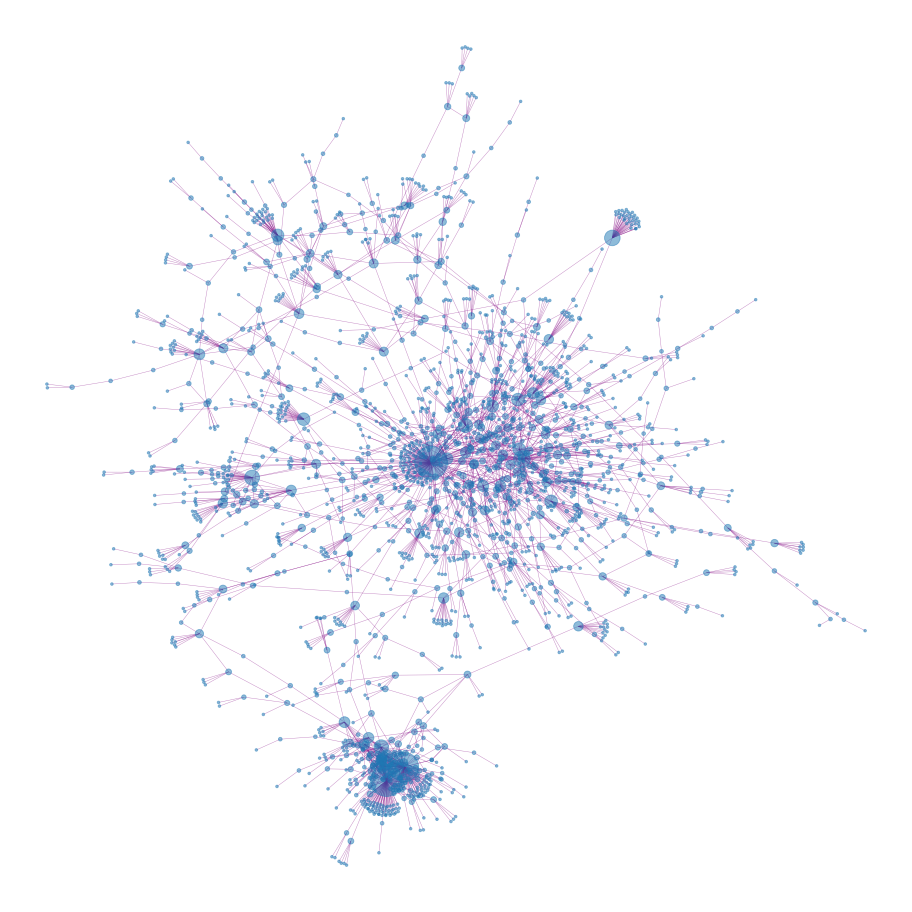

In [77]:
hashtag = "COVID19"
edges_df = get_network(df, hashtag)
G = nx.from_pandas_edgelist(edges_df, 'from', 'to', create_using=nx.DiGraph())
Gcc = get_weakly_gcc(G)
Gcc = Gcc.to_undirected()
Gcc_degree = Gcc.degree()

plot_network(Gcc, Gcc_degree, hashtag)



In [57]:
whole_network_graph = get_network(df)
G = nx.from_pandas_edgelist(whole_network_graph, 'from', 'to', create_using=nx.DiGraph())

weightDf = pd.DataFrame(dict(G.degree()).items(), columns=['user', 'degree'])
weightDf.sort_values(by="degree", inplace=True, ascending=False, ignore_index=True)
len(whole_network_graph)

15262

In [26]:
mentionDf = pd.DataFrame(dict(whole_network_graph.to.value_counts()).items(), columns=['user', 'num_replies_rcvd'])
mentionDf

user  num_replies_rcvd
0     realDonaldTrump               721
1          DiazCanelB               645
2         DeZurdaTeam               541
3       Maryam_Rajavi               127
4          WhiteHouse                99
...               ...               ...
7108             AARP                 1
7109       AHindinews                 1
7110     charms_india                 1
7111          choo_ek                 1
7112  everaldomarques                 1

[7113 rows x 2 columns]

In [27]:
combined = pd.concat([weightDf, mentionDf["num_replies_rcvd"]], axis=1)
combined = combined[0:10]

<AxesSubplot:xlabel='user'>

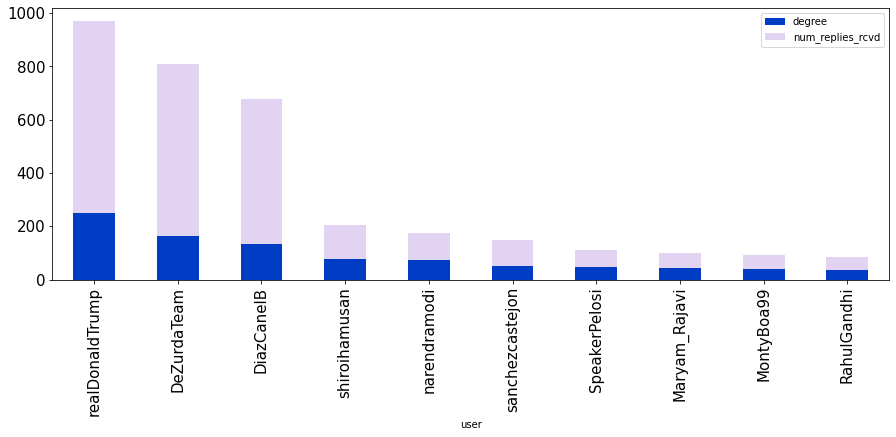

In [149]:
combined.plot.bar(stacked=True, x="user", figsize=(15,5), fontsize=15, color=["#013DC4", "#E2D3F3"])

In [52]:
print_basic_stats(G)

Number of nodes: 14632
Number of edges: 12383
Average clustering coefficient: 0.0035804306284722377
Average degree: 1.6925915800984144


NetworkXError: Found infinite path length because the graph is not connected

In [81]:
d = get_network(df, "stayhomestaysafe")
G = nx.from_pandas_edgelist(d, 'from', 'to', create_using=nx.DiGraph())

create_gephi_from_network(G, "stayhomestaysafe"), len(d)

12415


(None, 304)

<AxesSubplot:xlabel='country'>

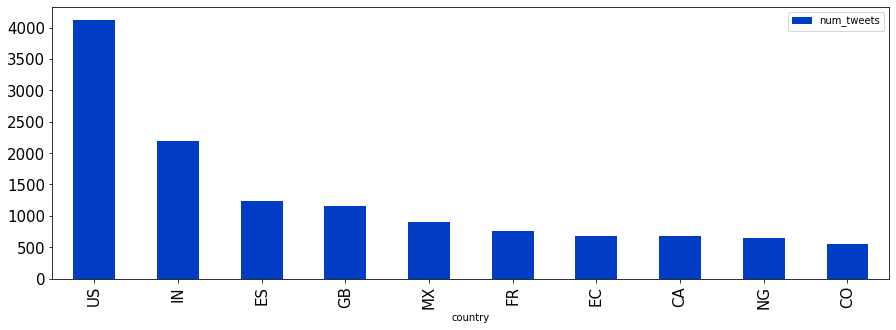

In [151]:
countryDf = pd.DataFrame(dict(df.country_code.value_counts()).items(), columns=['country', 'num_tweets'])
countryDf = countryDf[0:10]
countryDf.plot.bar(x="country", y="num_tweets", figsize=(15,5), fontsize=15, color="#013DC4")

<AxesSubplot:xlabel='date'>

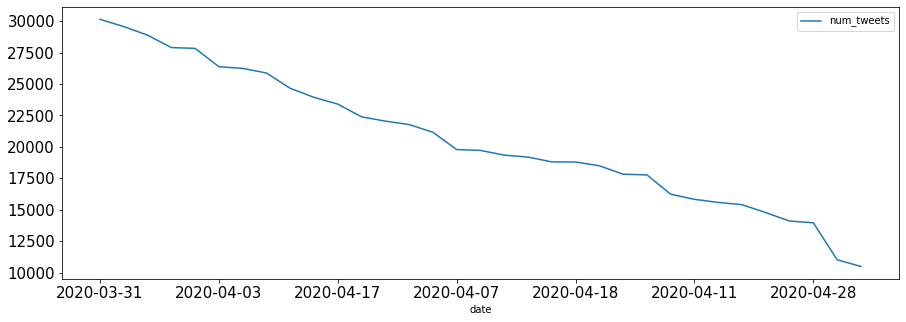

In [100]:
timeDf = df 
timeDf['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)
timeDf['created_at'] = timeDf['created_at'].dt.date
timeDf['created_at'] = timeDf['created_at'].astype(str)

timeDf = pd.DataFrame(dict(timeDf['created_at'].value_counts()).items(), columns=['date', 'num_tweets'])

timeDf.plot.line(x="date", y="num_tweets", figsize=(15,5), fontsize=15)

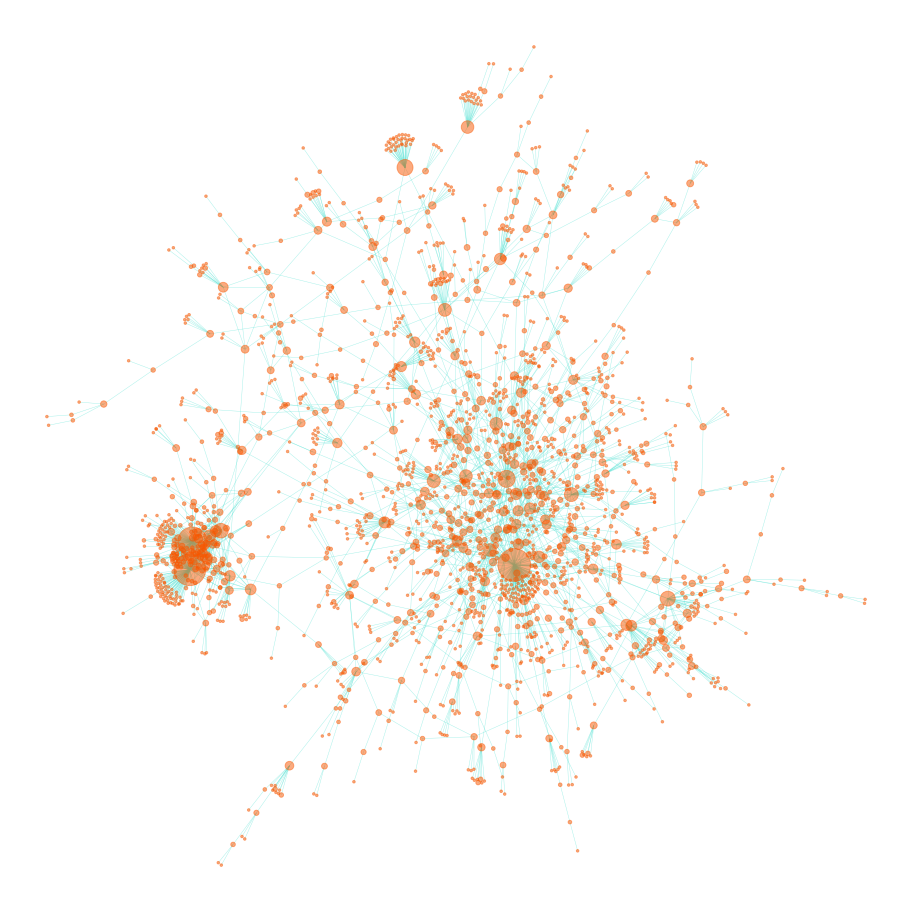

12147 16986


In [169]:
hashtag = "covid19"
edges_df = get_network(df, hashtag)
G = nx.from_pandas_edgelist(edges_df, 'from', 'to', create_using=nx.DiGraph())
Gcc = get_weakly_gcc(G)
Gcc = Gcc.to_undirected()
Gcc_degree = Gcc.degree()

plot_network(Gcc, Gcc_degree, hashtag)
print(G.number_of_nodes(), len(edges_df))
create_gephi_from_network(G, hashtag)


In [164]:
edges_df

from               to  created_at
0    Rebel_diaries_1       BPCLimited  2020-03-29
1       sanketdhende       BPCLimited  2020-03-29
2    NorthernComd_IA  NorthernComd_IA  2020-03-29
3         adkhatri26     narendramodi  2020-03-29
4       SkBloodSrini  Siva_Kartikeyan  2020-03-31
..               ...              ...         ...
469        rodmedi12  AintitMarvelous  2020-04-30
470  Upendra65831373  Atheist_Krishna  2020-04-30
471  ProfAkinAbayomi  ProfAkinAbayomi  2020-04-30
472    adgzonekanpur    adgzonekanpur  2020-04-30
473         JayGalla         JayGalla  2020-04-30

[474 rows x 3 columns]